#### Computational Modeling of Cognition and Behavior

# 2 From Words to Models
## Building a Toolkit

***

## 2.1 Response Times in Speeded-Choice Tasks

***

<br>

"Choice rection time" task (Smith and Vickers 1998)

<br>

Can be approached using a "random walk model":

<br>

Simple model assumptions:

- Evidence for a decision is built up gradually.

- Evidence is sampled at discrete time steps.

- Sampling starts with 0 evidence


How the model works:

- Magnitude of discrete nudges towards a decision reflects the information available at a single sample.

- Sampled evidence is summed accross time steps until a response threshold is reached.

- Sampling starts with 0 evidence and moves towards one of two thresholds, each representing a choice (left/righ for example).

Some conclusions:

- If the two thresholds are equidistant from 0, the reponse times should be equal.


Prediction of the model:

- Response time is dependent on evidence 

<br>

## 2.1 Response Times in Speeded-Choice Tasks

***
<br>

### 2.2.1 Getting started

<br>

### 2.2.2 The Random-Walk Model

<br>

First, a function is created to simulate a single trial, it takes the evidence for a single trial and a threshold as it's inputs.

<br>


In [4]:
import numpy as np


def random_walk_trial(acc_evidence_row, threshold):
    """ Single trial for a random walk model of decision making. See python 
    file with the same name for full docstring."""
    try:
        # look for the first index when the threshold is crossed
        trial_latency = np.where(np.abs(acc_evidence_row) >= threshold)[0][0]
    # if the index is never crossed
    except IndexError:  
        trial_latency = -1  # no latency
    if trial_latency == -1:
        trial_response = 0  # no response
    # if the index is crossed
    else:
        trial_response = np.sign(acc_evidence_row[trial_latency])
        # fix values once the threshold is crossed
        acc_evidence_row[trial_latency:] = trial_response * threshold  
    return acc_evidence_row, trial_latency, trial_response


<br>

Then, a function is created to generate evidence, with a row for every trial. It then runs the random walk model on every trial. Two dataframes are output. 'df_trial_data' gives a trial per row, containing the trial response and trail latency (time taken to make a decision). The second dataframe 'df_dv' contains the decision variable (dv) for every time point (rows) for every trial (columns). 

<br>

In [12]:
import pandas as pd

def random_walk(nreps, nsamples, drift, sd_rw, threshold):
    """Random walk model of decision making. See python file with the same name for full 
    docstring."""
    # construct evidence accumulator for every trial (rep)
    start_zero_evidence = np.zeros((nreps, 1))
    rand_norm_incr = np.random.normal(loc=drift,
                                      scale=sd_rw,
                                      size=[nreps, nsamples])
    evidence_incr = np.concatenate((start_zero_evidence, rand_norm_incr),
                                   axis=1)
    acc_evidence = evidence_incr.cumsum(axis=1)
    # run the random walk function on every row of evidence
    dv, trial_latency, trial_response = zip(*[random_walk_trial(acc_evidence_row, threshold)
                                              for acc_evidence_row
                                              in acc_evidence])
    # generate column names, giving each trial a number
    column_names = ["trial_" + str(trial_n) for trial_n in np.arange(nreps)]
    # package into dataframes
    dv_array = np.asarray(dv).T
    df_dv = pd.DataFrame(data=dv_array,
                         columns=column_names)
    df_trial_data = pd.DataFrame(data={'trial_latency': trial_latency,
                                       'trial_response': trial_response})
    return df_dv, df_trial_data

<br>

Then I set some specific values to variables and run a simulation.

<br>


In [36]:
from IPython.display import display

# set example params
df_dv, df_trials = random_walk(nreps=2000,
                               nsamples=200,
                               drift=0,  # the amount of evidence, 0 gives a random decision 
                               sd_rw=0.3,  # standard deviation of random walk (noise in the evidence)
                               threshold=3)

df_dv_above, df_trials_above = random_walk(nreps=2000,
                                             nsamples=200,
                                             drift=0.3,  # the amount of evidence, 0.3 gives a decision to the above boundry 
                                             sd_rw=0.3,  # standard deviation of random walk (noise in the evidence)
                                             threshold=3)


display(df_dv.head())
display(df_trials.head())

,trial_0,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,...,trial_1990,trial_1991,trial_1992,trial_1993,trial_1994,trial_1995,trial_1996,trial_1997,trial_1998,trial_1999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.298116,-0.060092,-0.230946,-0.278981,0.346808,0.570173,0.725298,-0.137117,-0.443101,0.031899,...,-0.030399,-0.552294,-0.168260,0.221682,0.298649,-0.238182,-0.133137,-0.392960,-0.134668,-0.188557
2,0.192789,-0.588323,-0.290429,-0.266433,0.888461,0.696217,0.627217,-0.206355,-0.269943,0.007131,...,0.378968,-0.616303,-0.370158,0.091863,0.419899,0.208782,-0.447037,-0.875031,-0.393235,0.149794
3,0.327567,-0.234101,-0.396898,-0.003149,0.376012,0.423596,0.419937,-0.513093,-0.027955,0.141060,...,0.559789,-0.524293,0.075411,0.199900,0.271320,0.121543,-0.474551,-0.732345,-0.068962,0.127031
4,0.433553,0.121447,-0.197272,0.405234,0.255601,0.116101,0.717752,-0.100756,-0.308593,-0.310915,...,0.686357,-0.981523,0.536340,-0.252083,-0.045768,-0.177312,-0.336156,-0.177585,-0.064975,0.288796


,trial_latency,trial_response
0,36,-1.0
1,27,1.0
2,129,1.0
3,168,-1.0
4,-1,0.0


<br>

From this point, it is simple to plot and visualise the decision variable for several trials.

<br>

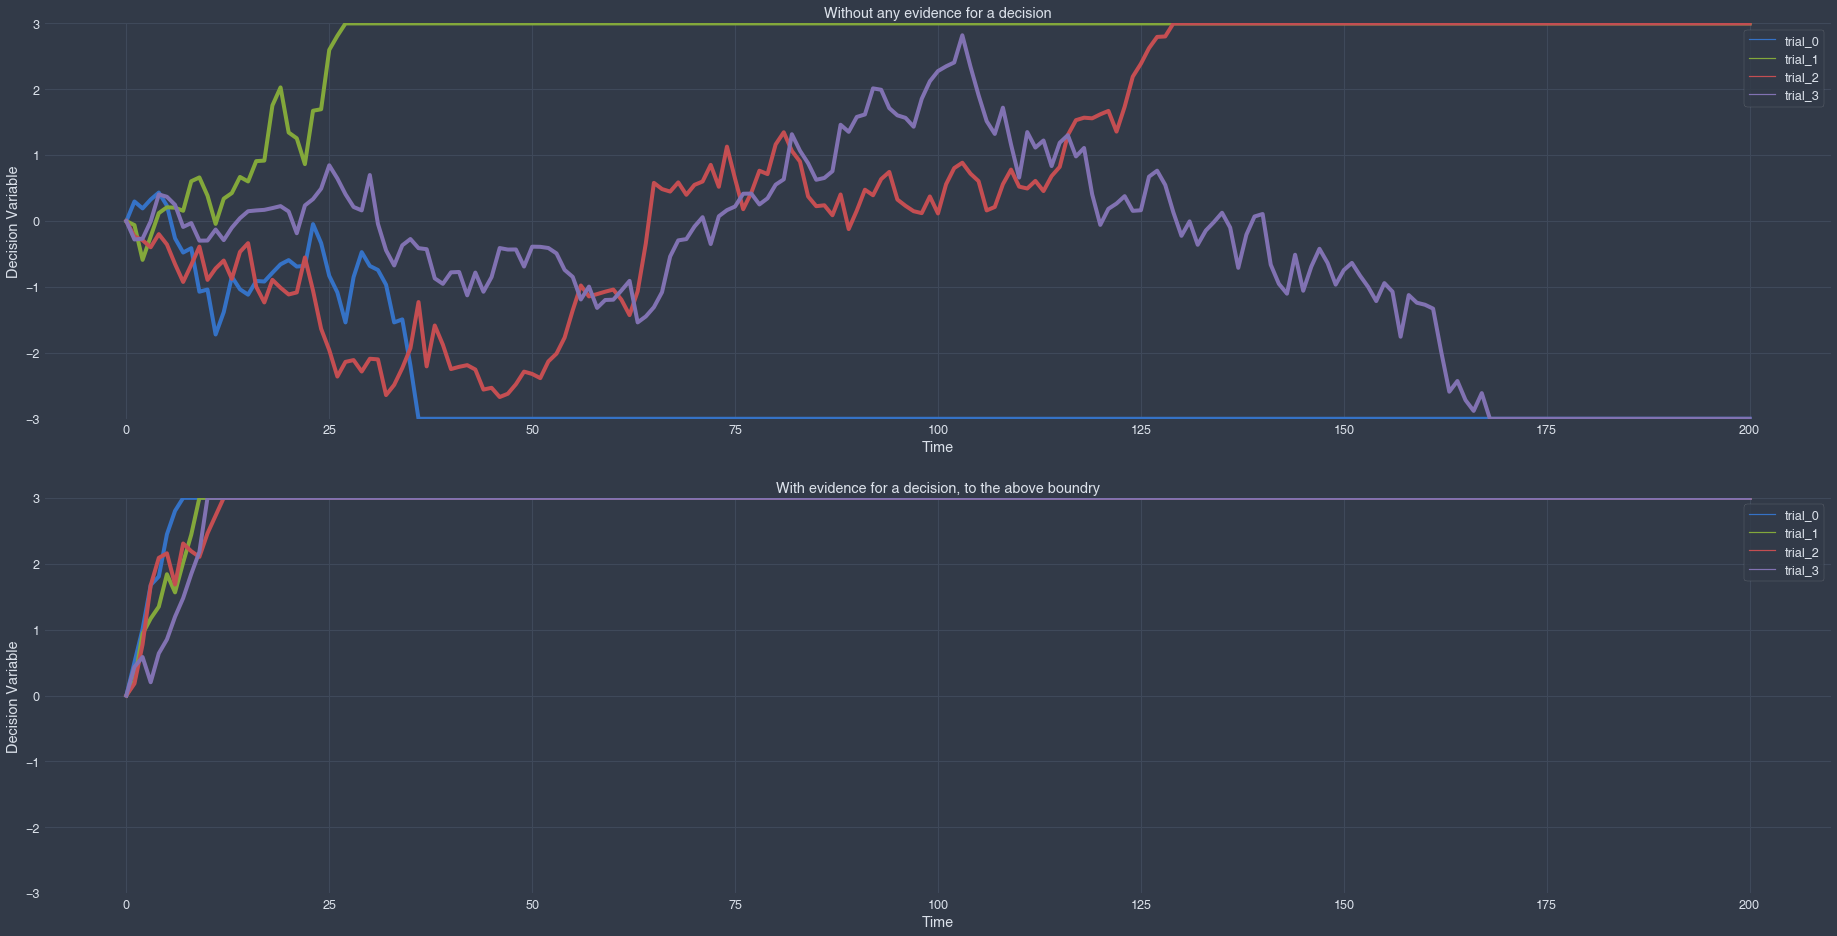

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('chesterish',
             spines=False,
             figsize=(40, 20))

plt.subplot(2, 1, 1)
plt.xlabel('Time')
plt.ylabel('Decision Variable')
plt.title('Without any evidence for a decision')
plt.ylim(-3,3)
sns.lineplot(data=df_dv.iloc[:, 0:4],
             dashes=False,
             linewidth=4);

plt.subplot(2, 1, 2)
plt.xlabel('Time')
plt.ylabel('Decision Variable')
plt.title('With evidence for a decision, to the above boundry')
plt.ylim(-3,3)
sns.lineplot(data=df_dv_above.iloc[:, 0:4],
             dashes=False,
             linewidth=4);